
# Project 2: The best predictor for "No-show appointment"


### by Aisulu Raganina | Udacity | Nanodegree Program


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 
> The data which was used for the analyses is "noshowappointments-kagglev2-may-2016.csv" from the official website https://www.kaggle.com. The dataset includes the information about 100000 medical appointments in Brazil. In this Project we are going to analyse which is the best possible predictor of whether or not patients show up for their appointment. Does the No-show appointment depend on Age, Gender or the number of days a patient should wait between scheduling day and appointment day itself?

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will check for possible missing data, duplicates, incorrect data types, check for cleanliness

### General Properties

In [9]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

1. Some columns' names should be renamed due to mispelling and make columns easier to read

In [11]:
df.shape

(110527, 14)

2.There 110527 records and 14 columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
df.isnull().sum()   

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

3. The dataset has no missing values

In [14]:
sum(df.duplicated())  

0

4. The dataset has no duplicated rows

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

5. The "ScheduledDay" and "AppointmentDay" are strings and should be converted to Datetime type
6. The "PatienID" would be also converted from float to integer to make dataset easier to work with
7. The "No-show" and "Gender" would be converted from "Yes/No" and "F/M" to "1/0" in order to handle using plots

In [17]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8547064c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f854970e710>]], dtype=object)

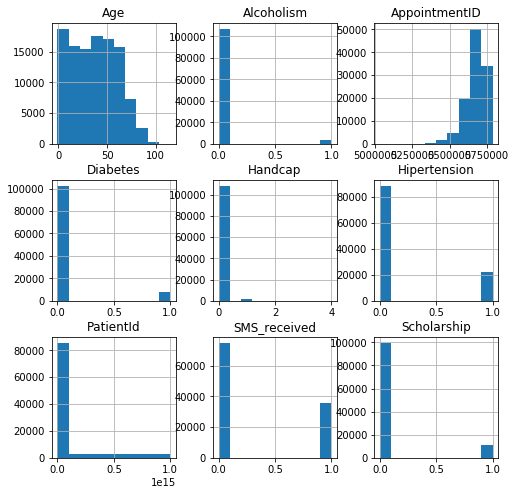

In [18]:
df.hist(figsize =(8,8))

8. According to the histogram of the data, there are more non-alcoholics than alcoholics; more non-diabetics than diabetics and more non-handicapt than handicapt patients. Most of the patients are not in the Scholarship program.

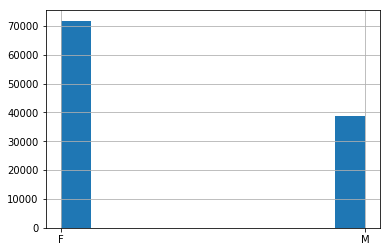

In [19]:
df['Gender'].hist()

9. According to the observation, there are almost twice more females than males. For calculations I will take the proportion of Females and Males who showed up on their appointment

In [20]:
df[(df['Age'] <= 0) | (df['Age']>= 100)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


10. The "Age" variable shows the negative, as well as 0 and more than 100. We will take the assumption that: a) 0 years can be an age - newborns; b) a value between 0 and 100 is a legitimate value for age; c) the negative values and the values higher than 100 would be conisdered as invalid data and would be handled as missing data.   (<https://stats.stackexchange.com/questions/90371/how-to-deal-with-invalid-data-values-such-as-with-age-e-g-99-0-f1>)

### Data Cleaning (Replace this with more specific notes!)

In [21]:
#Some columns' names should be renamed due to mispelling and make columns easier to read
df.rename(columns={'PatientId': 'Patient_Id', 'AppointmentID': 'Appointment_ID', 'ScheduledDay' : 'Scheduled_Day', 'AppointmentDay':'Appointment_Day', 'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap' , 'No-show':'No_show'}, inplace=True)
df.head(5)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])  

The "Scheduled_Day" and "Appointment_Day" are strings and should be converted to Datetime type.

In [23]:
df['Scheduled_Day'] = df['Scheduled_Day'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [24]:
df['Appointment_Day'] = df['Appointment_Day'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [25]:
df.head()

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id         110527 non-null float64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null datetime64[ns]
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [27]:
df['Days_until_appointment'] = (df['Appointment_Day'] - df['Scheduled_Day']).dt.days 

I created the column 'Days_until_appointment' which is equal to the number of waiting days between scheduled and appointment date.

In [28]:
print('Days_until_appointment:',sorted(df.Days_until_appointment.unique()))


Days_until_appointment: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [29]:
df[df['Days_until_appointment'] < 0].count()

Patient_Id                5
Appointment_ID            5
Gender                    5
Scheduled_Day             5
Appointment_Day           5
Age                       5
Neighbourhood             5
Scholarship               5
Hypertension              5
Diabetes                  5
Alcoholism                5
Handicap                  5
SMS_received              5
No_show                   5
Days_until_appointment    5
dtype: int64

The 'Days_until_appointment' shows 5 negative values. The negative values would be conisdered as invalid data and would be handled as missing data.

In [30]:
Days_until_appointment_mean = df['Days_until_appointment'].mean()
df[df['Days_until_appointment'] < 0] = Days_until_appointment_mean

In [31]:
df['Patient_Id'] = df['Patient_Id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
Patient_Id                110527 non-null int64
Appointment_ID            110527 non-null float64
Gender                    110527 non-null object
Scheduled_Day             110527 non-null object
Appointment_Day           110527 non-null object
Age                       110527 non-null float64
Neighbourhood             110527 non-null object
Scholarship               110527 non-null float64
Hypertension              110527 non-null float64
Diabetes                  110527 non-null float64
Alcoholism                110527 non-null float64
Handicap                  110527 non-null float64
SMS_received              110527 non-null float64
No_show                   110527 non-null object
Days_until_appointment    110527 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 12.6+ MB


The "Patient_ID" would also be converted from float to integer to make dataset easier to work with

In [32]:
df.No_show.replace(('Yes', 'No'), (0, 1), inplace= True)
df['No_show'].astype(int)

0         1
1         1
2         1
3         1
4         1
5         1
6         0
7         0
8         1
9         1
10        1
11        0
12        1
13        1
14        1
15        1
16        1
17        0
18        1
19        1
20        0
21        0
22        0
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
110497    1
110498    1
110499    1
110500    1
110501    1
110502    1
110503    1
110504    1
110505    1
110506    1
110507    1
110508    1
110509    1
110510    1
110511    1
110512    1
110513    1
110514    1
110515    0
110516    0
110517    1
110518    1
110519    1
110520    1
110521    1
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No_show, Length: 110527, dtype: int64

The "No-show" would be converted from "Yes/No" to "0/1" in order to handle using plots

In [33]:
show_up = df['No_show'] == 1
not_show_up = df['No_show'] == 0
df['show_up'] = show_up
df['not_show_up'] = not_show_up

In [35]:
df.Gender.replace(('F', 'M'), (1, 0), inplace= True)

The "Gender" would be converted from  "F/M" to "1/0" in order to handle using  plots

In [36]:
df['Gender'].astype(int)
Female = df['Gender'] == 1
Male = df['Gender'] == 0

df['Female'] = Female
df['Male'] = Male
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
Patient_Id                110527 non-null int64
Appointment_ID            110527 non-null float64
Gender                    110527 non-null float64
Scheduled_Day             110527 non-null object
Appointment_Day           110527 non-null object
Age                       110527 non-null float64
Neighbourhood             110527 non-null object
Scholarship               110527 non-null float64
Hypertension              110527 non-null float64
Diabetes                  110527 non-null float64
Alcoholism                110527 non-null float64
Handicap                  110527 non-null float64
SMS_received              110527 non-null float64
No_show                   110527 non-null float64
Days_until_appointment    110527 non-null float64
show_up                   110527 non-null bool
not_show_up               110527 non-null bool
Female                    110527 non-null bool
Mal

In [38]:
Age_mean = df['Age'].mean()
df[(df['Age'] < 0) | (df['Age']> 100)] =Age_mean

The variable "Age" has invalid data and is filled in with mean

<a id='eda'></a>
## Exploratory Data Analysis

> In this report I am going to analyse how three independent variables named Age, Gender and Days_until_appointment effect our dependent variable No-show.

### Research Question 1: The proportion of Show-up vs. No-show-up

First,  I calculated the proportion of those who showed up and those who had not shown up on their appointment. 
The result would be shown in percentage.

In [39]:
df['No_show'].count() 
not_show_up.sum()
show_up.sum()        

Proportion_show_up = show_up.sum() * 100 / df['No_show'].count().round(1)
print(Proportion_show_up.round(1))

Proportion_not_show_up = not_show_up.sum() * 100 / df['No_show'].count().round(1)
print(Proportion_not_show_up.round(1))

79.8
20.2


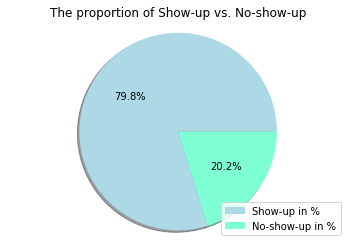

In [42]:
labels = ['Show-up in %', 'No-show-up in %']
sizes = [Proportion_show_up, Proportion_not_show_up]
colors = ['lightblue','aquamarine']
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True)
plt.legend(labels, loc="lower right")
plt.axis('equal')
plt.title('The proportion of Show-up vs. No-show-up')
plt.show()

The pie chart shows that 20,2% showed up on their appointment while 79,8% decided not show up. 

### Research Question 2 : How does the Age effect the No-show-up/Show-up?

> Does Age effect the decision to show-up on the appointment?

In [43]:
df.Age[show_up].mean()

37.787257835114573

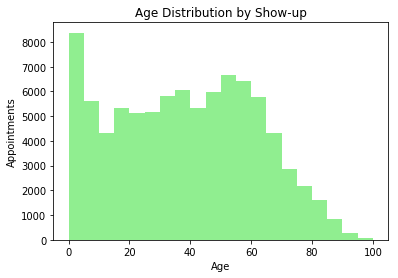

In [44]:
show_up_age = df['Age'][show_up]
plt.hist(show_up_age, stacked=True, bins=20, color='lightgreen')
plt.title('Age Distribution by Show-up')
plt.xlabel('Age')
plt.ylabel('Appointments');

In [45]:
df.Age[not_show_up].mean()

34.307397305363061

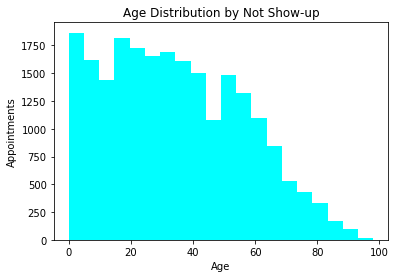

In [46]:
not_show_up_age = df['Age'][not_show_up]
plt.hist(not_show_up_age, stacked=True, bins=20, color='cyan')
plt.title('Age Distribution by Not Show-up')
plt.xlabel('Age')
plt.ylabel('Appointments');

### Research Question 3 : How does the Gender effect the No-show-up/Show-up?

> Does Gender effect the desicion to show-up or not on the appointment?

In [47]:
Male.sum()

38685

In [48]:
Female.sum()

71837

As we can observe the number of Females is almost twice as high as the number of males in the dataset. Therefore, we will compare the proportion of females who showed up on the appointment with the proportion of males who showed up on the appointment.

In [49]:
df.Male[show_up].sum()
Proportion_male_show_up = df.Male[show_up].sum() * 100 / Male.sum()
print(Proportion_male_show_up.round(1))

80.5


In [50]:
df.Female[show_up].sum()
Proportion_female_show_up = df.Female[show_up].sum() * 100 / Female.sum()
print(Proportion_female_show_up.round(1))

79.9


Text(0,0.5,'Proportion in %')

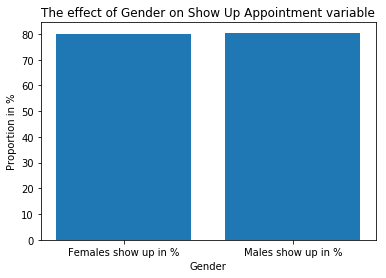

In [51]:
plt.bar(['Females show up in %', 'Males show up in %'], [Proportion_female_show_up, Proportion_male_show_up])
plt.title('The effect of Gender on Show Up Appointment variable')
plt.xlabel('Gender')
plt.ylabel('Proportion in %')


### Research Question 4 : How does the Days_until_appointment effect the No-show-up/Show-up?

> Does the number of waiting days effect the decision to show up on the appointment?

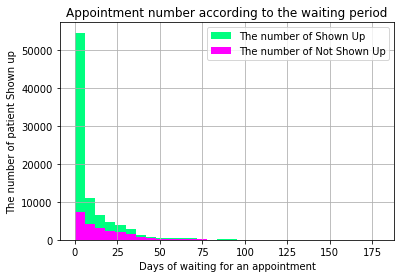

In [52]:
df['Days_until_appointment'][show_up].hist(color='springgreen', bins=30)
df['Days_until_appointment'][not_show_up].hist(color='magenta', bins=30)
labels = ['The number of Shown Up', 'The number of Not Shown Up']
plt.title('Appointment number according to the waiting period')
plt.xlabel('Days of waiting for an appointment')
plt.ylabel('The number of patient Shown up')
plt.legend(labels, loc="upper right")

<a id='conclusions'></a>
## Conclusions

1 - According to the investigation, 79,8 % of the patients did not show up on the appointment.

#### Results:

2 - How does the Age effect the No-show-up/Show-up?

The Age of the patients was used to predict the large difference between the No-show-up and show-up groups. The mean age of the show-up was 37,8  compared to No-show-up which was 34,3. No significant differences to note.

3 - How does the Gender effect the No-show-up/Show-up?

The proportions of females and males who showed up on the appointment were calculated in order to see whether the Gender effects the Show-up rate. There were 80.5% males and  79.9% females who showed up on the appointment. No significant differences to note. 

4 - How does the Days_until_appointment effect the No-show-up/Show-up?

The timeframe between scheduled date and apppointment date was investigated to see if the longer waiting period would effect the decision to not show up. The Show-up rate was better if the timeframe between scheduled and apppointment date was no longer than one month of waiting. There is a high peak of Show-Up patients if the scheduled date and appointment date were on the same week approximately.


#### Limitations:

There were some invalid/negative data for Age and period of days between scheduled and appointment days.

The dataset does not include the data regarding the social insurance situation and income level of the family households which could expand analyses and separate the No-shows-ups into different Social Insurance Groups and/or Income classes.


#### Resources:

API Reference: https://pandas.pydata.org/pandas-docs/version/0.23.3/api.html

Markdown: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis

Basic date and time types: https://docs.python.org/3/library/datetime.html

Renaming column: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

Matplotlib Pie chart: https://pythonspot.com/matplotlib-pie-chart/

Pandas Cheat Sheet: Guide: https://www.dataquest.io/blog/pandas-cheat-sheet/



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0